In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 6]

In [2]:
import re
from datetime import timedelta
def parse_line(filename):
    with open(filename) as f:
        file = f.read()
        
    stats_regex = "\[(?P<epoch>[0-9]+)\] - (.*) - (\d+\.\d+),(\d+\.\d+),(\d+\.\d+)"
    stats_regex = re.compile(stats_regex)
    stats_match = stats_regex.findall(file)
    
    time_regex = "\[([0-9]+)\] - (.*) - (\d\:\d+\:\d+\.\d+)"
    time_regex = re.compile(time_regex)
    times = time_regex.findall(file)
    
    stats = [(int(x[0]), x[1], float(x[2]), float(x[3]), float(x[4])) for x in stats_match]
    #time_matches = [(int(x[0]), x[1], float(x[2]), float(x[3])) for x in stats_match]
    
    train_stats = [x for x in stats if "train" in x[1]]
    train_times = [x for x in times if "train" in x[1]]
    
    eval_stats = [x for x in stats if "eval" in x[1]]
    eval_times = [x for x in times if "eval" in x[1]]

    return train_stats, train_times, eval_stats, eval_times

In [3]:
def plot_results(filename, stat: str = "loss"):
    stat_map = {"loss":2, "top1":3, "top5": 4}
    index = stat_map.get(stat,2)
    train_stats, train_times, eval_stats, eval_times= parse_line(filename)
    
    plt.plot([x[0] for x in train_stats][2:], np.convolve([x[3] for x in train_stats], np.ones(3)/3, mode='valid'))
    plt.plot([x[0] for x in eval_stats][2:], np.convolve([x[3] for x in eval_stats], np.ones(3)/3, mode='valid'))
    plt.grid(True)
    plt.title(filename)
    plt.xlabel("Epoch")
    plt.ylabel("Top1 Accuracy")
    plt.show()

In [4]:
def plt_multiple(folder):
    files= [os.path.join(root, file) for root, subdir, files in os.walk(folder) for file in files if file == "training.log"]
    files = sorted(files, key=os.path.getmtime)
    for file in files:
        plot_results(file)

def print_results(folder):
    files= [(root,os.path.join(root, file)) for root, subdir, files in os.walk(folder) for file in files if file == "training.log"]
    files = sorted(files, key= lambda x: os.path.getmtime(x[1]))
    data = {}
    for root, file in files:
        train_stats, train_times, eval_stats, eval_times= parse_line(file)
        max_acc = max(eval_stats, key=lambda x:x[3])
        #print(f"{os.path.split(root)[-1]:<30} {max_acc[3]}")
        data[os.path.split(root)[-1]]=max_acc[3]
    return data

def parse_name(name):
    parts = name.split("_")
    window = int(parts[1])
    samples = int(parts[2])
    return window, samples

In [6]:
from collections import defaultdict
data = print_results("/media/barny/SSD4/MasterThesis/Data/logs/window_tests")
dd = defaultdict(list)
for d in data:
    dd[d[:-2]].append(data[d])
    #dd[d[:-2]][d[-1]] = data[d]
results = []
for d in dd:
    results.append((d, np.mean(dd[d]), len(dd[d])))
results = sorted(results, key= lambda x:x[1], reverse= True)
for name, score, dups in results:
    print(f"{name:20}{score:7.4f}{dups:>5}")

default_100_50       0.9707    3
default_100_25       0.9692    3
default_100_20       0.9666    3
default_100_100      0.9639    3
default_64_64        0.9605    3
default_60_30        0.9601    3
default_64_32        0.9596    3
default_60_20        0.9571    3
default_64_16        0.9561    3
default_60_60        0.9552    3
default_60_15        0.9548    3
default_50_25        0.9525    3
default_100_10       0.9513    3
default_60_12        0.9512    3
default_50_50        0.9505    3
default_60_10        0.9467    3
default_50_10        0.9459    3
default_64_8         0.9416    3
default_30_30        0.9389    3
default_32_32        0.9370    3
default_32_16        0.9341    3
default_60_6         0.9325    3
default_30_15        0.9310    3
default_32_8         0.9303    3
default_30_10        0.9294    3
default_50_5         0.9222    3
default_60_5         0.9216    3
default_100_5        0.9198    3
default_60_4         0.9142    3
default_30_6         0.9140    3
default_30

In [29]:
print_results("./logs/augment_test")

{'xview_joints_none': 0.9562236286919831,
 'xview_joints_mean_spine': 0.9675105485232067,
 'xview_joints_spine': 0.9580168776371308,
 'xview_joints_screen': 0.9691983122362869,
 'xview_joints_relative': 0.9556962025316456,
 'xview_joints_spine_align': 0.9622890295358649,
 'xview_joints_mean_spine_align': 0.9608122362869198}

In [32]:
from collections import defaultdict

data = [print_results("./logs/norm_tests2"),print_results("./logs/norm_tests3")]
avg = defaultdict(list)
for d in data:
    for k,v in d.items():
        avg[k].append(v)
avg = sorted([(k,np.mean(v)) for k,v in avg.items()], key=lambda x:np.mean(x[1]))
print(avg)

[('xsub_joints_relative', 0.8606582125603865), ('xsub_joints_mean_spine', 0.8723429951690821), ('xsub_joints_spine', 0.8754830917874397), ('xsub_joints_screen', 0.88118961352657), ('xsub_joints_none', 0.8848429951690822), ('xsub_joints_mean_spine_align', 0.9030797101449275), ('xsub_joints_spine_align', 0.9042874396135265)]


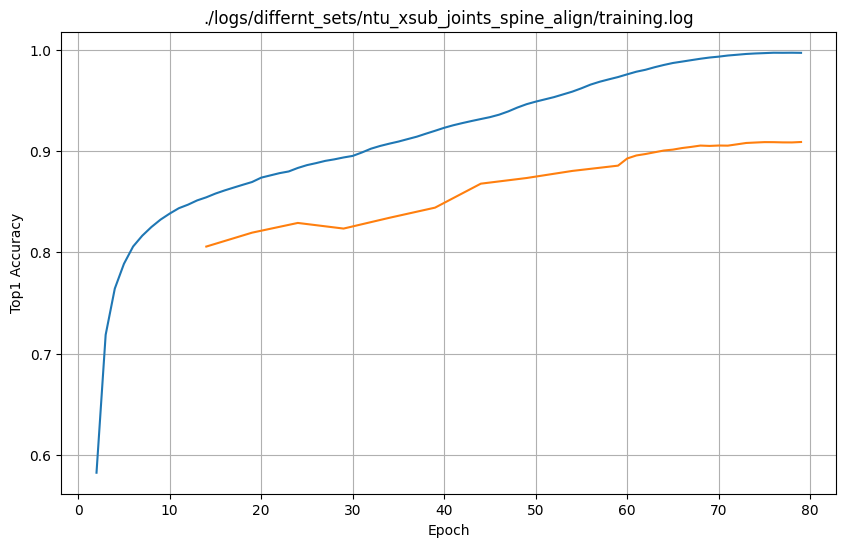

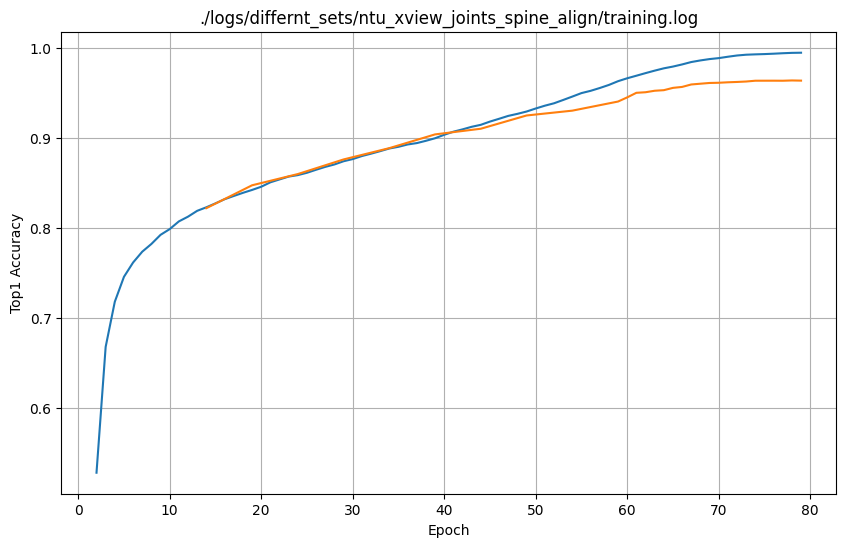

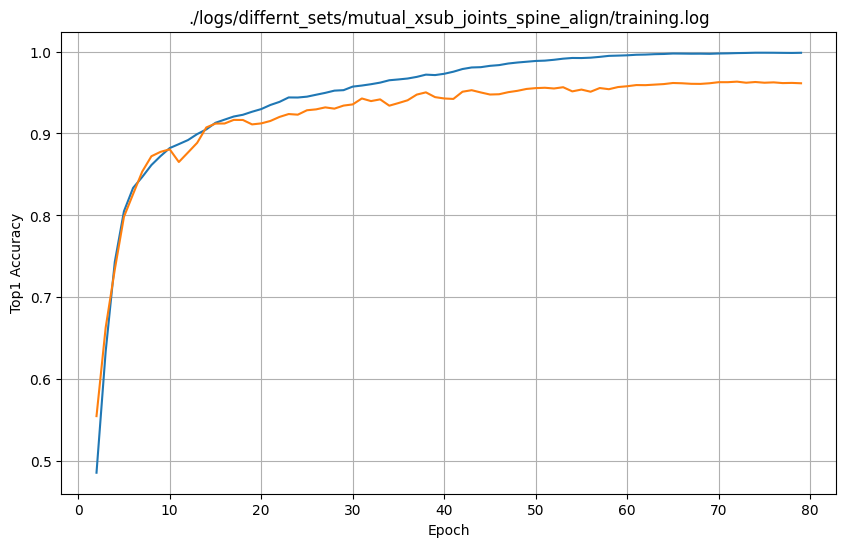

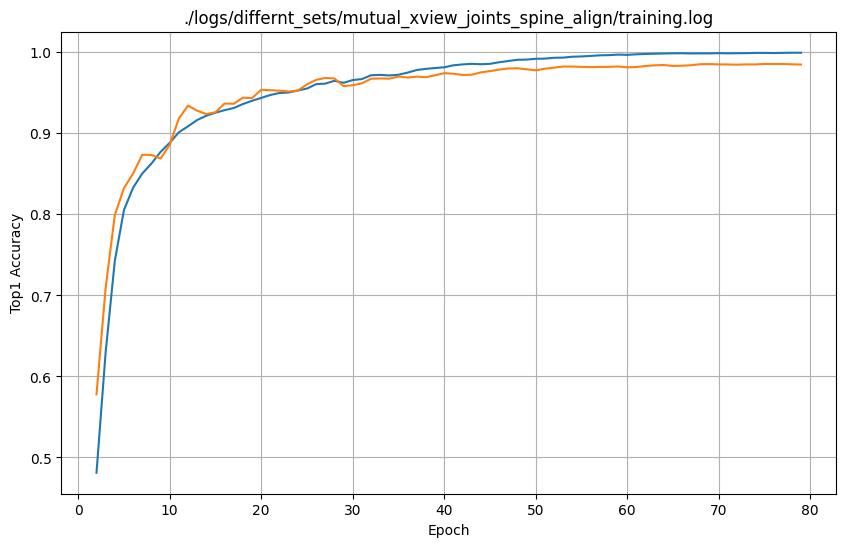

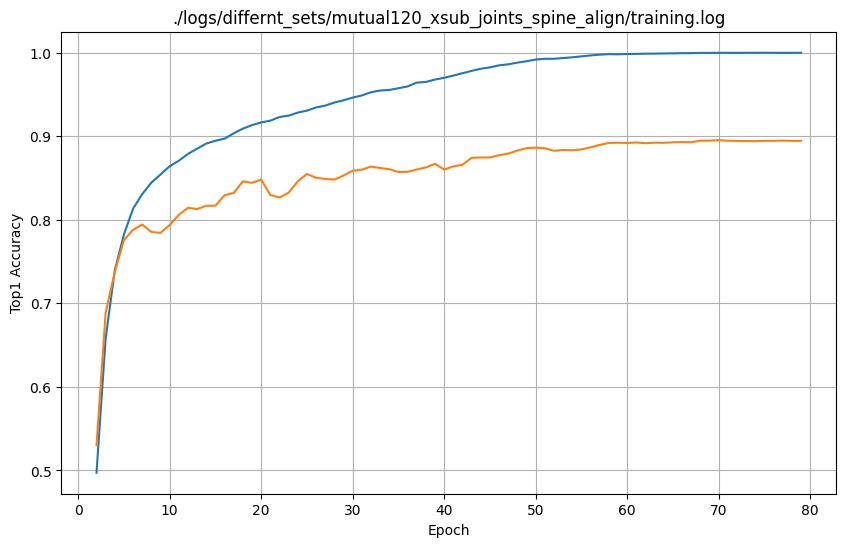

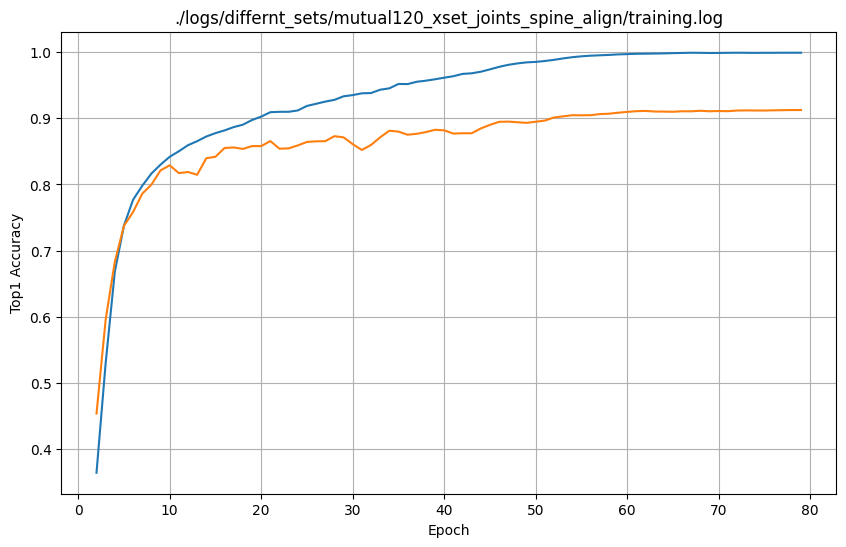

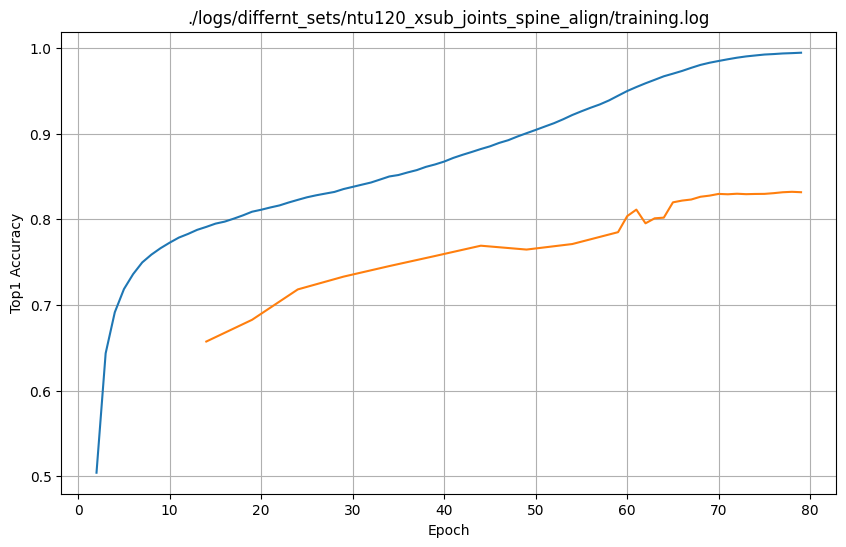

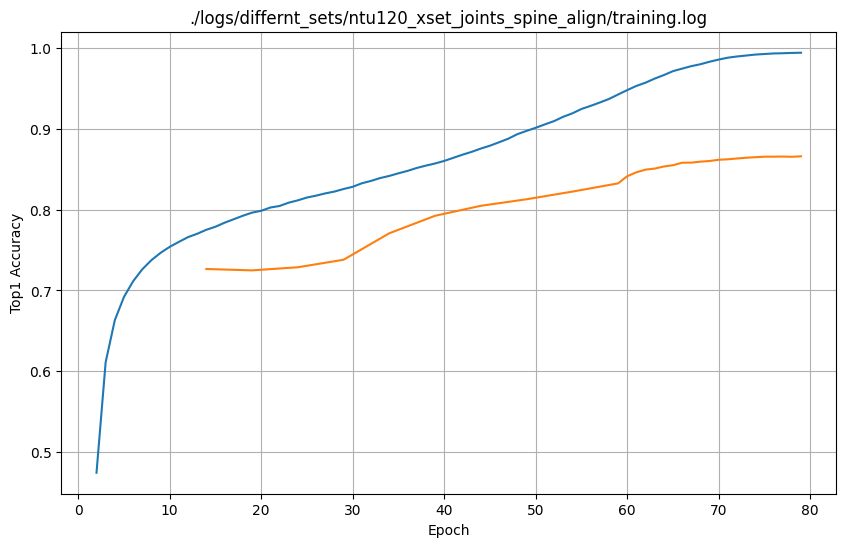

In [28]:
plt_multiple("./logs/differnt_sets")

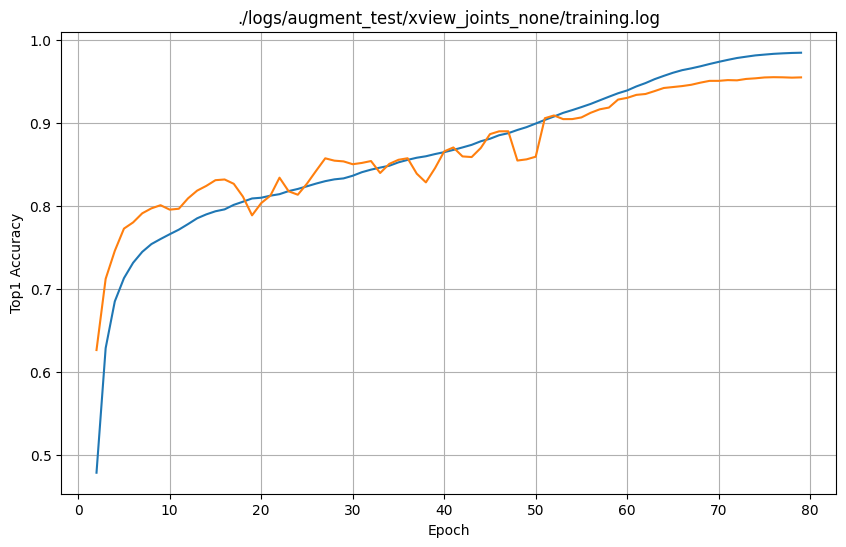

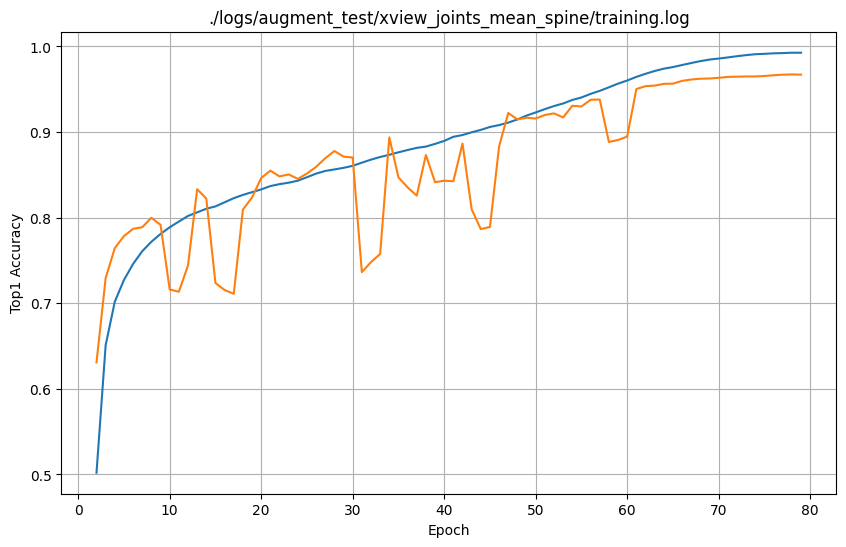

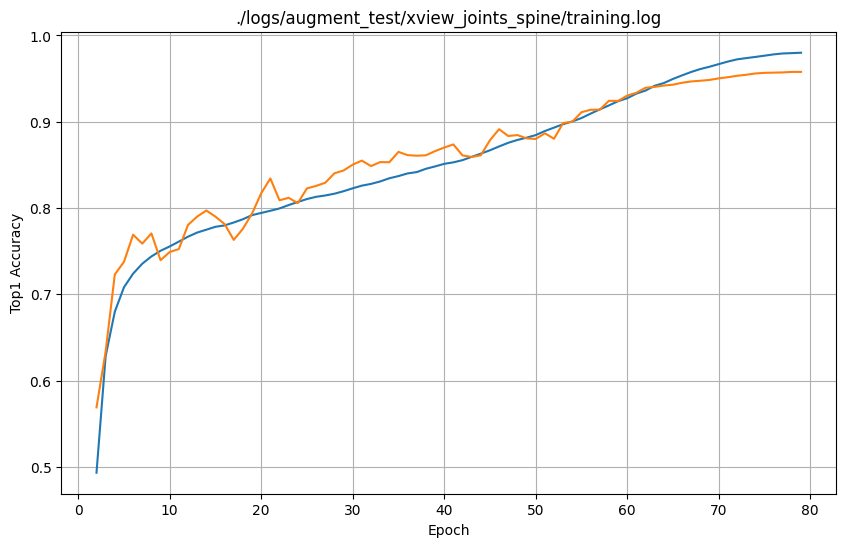

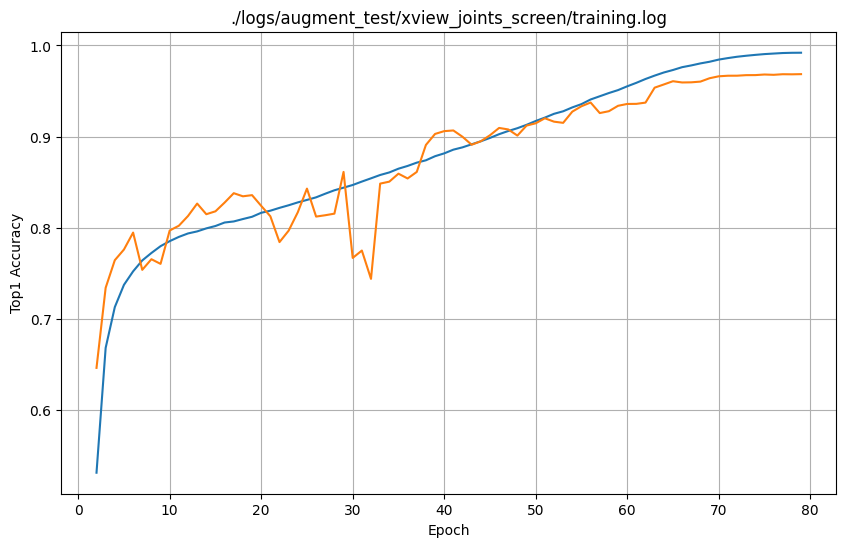

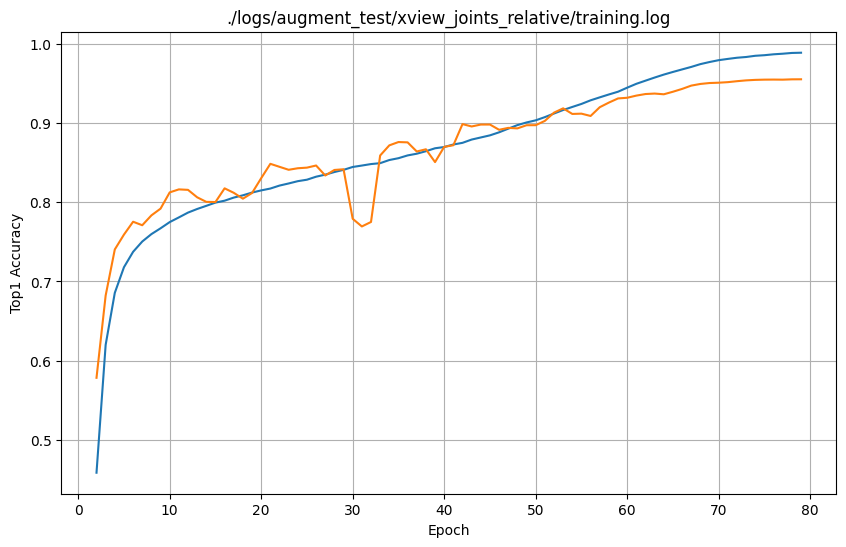

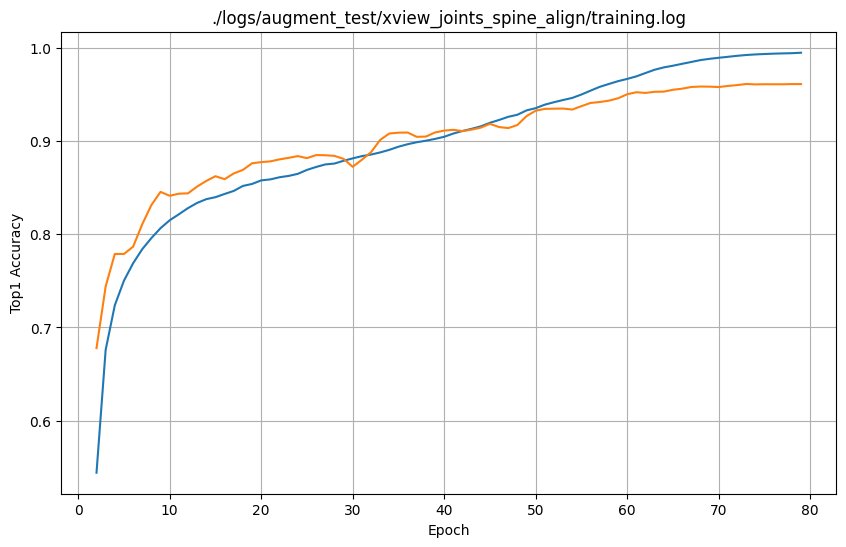

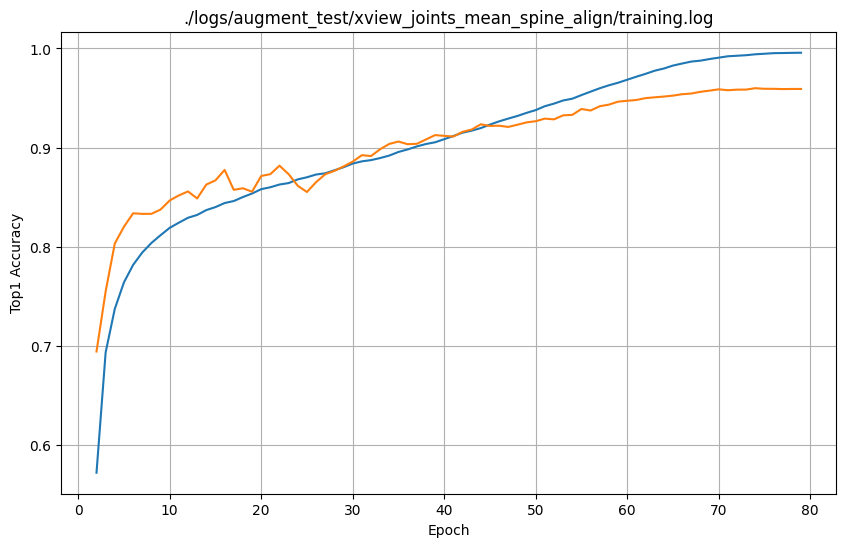

In [10]:
plt_multiple("./logs/augment_test")